# Quantum tomography for n-qubit

Compare between optimizers

In [1]:
import qiskit
import numpy as np
import matplotlib.pyplot as plt
import qtm.base_qtm, qtm.constant, qtm.qtm_nqubit, qtm.qtm_1qubit
import importlib
importlib.reload(qtm.base_qtm)
importlib.reload(qtm.constant)
importlib.reload(qtm.qtm_nqubit)
importlib.reload(qtm.qtm_1qubit)

<module 'qtm.qtm_1qubit' from 'c:\\Users\\haime\\OneDrive\\Máy tính\\QuantumTomographyProject\\qtm\\qtm_1qubit.py'>

In [10]:
num_qubits = 3
# Below is the number of layer for reconstructed circuit
num_layers = 3
phis = np.random.uniform(low = 0, high = 2*np.pi, size = num_qubits*10)


In [11]:
thetas = np.zeros((num_layers*num_qubits*3))
qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
qc = qtm.qtm_nqubit.create_arbitrary_nqubit(qc, phis, num_layers = 2)

thetas, loss_values_sgd = qtm.base_qtm.fit(
    qc, num_steps = 200, thetas = thetas, 
    create_circuit_func = qtm.qtm_nqubit.u_cluster_nlayer_nqubit, 
    grad_func = qtm.base_qtm.grad_loss,
    loss_func = qtm.base_qtm.loss_basis,
    optimizer = qtm.base_qtm.sgd,
    verbose = 1,
    num_layers = num_layers
)

Step: 100%|██████████| 200/200 [07:07<00:00,  2.14s/it]


In [12]:
thetas = np.zeros((num_layers*num_qubits*3))
qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
qc = qtm.qtm_nqubit.create_arbitrary_nqubit(qc, phis, num_layers = 2)

thetas, loss_values_adam = qtm.base_qtm.fit(
    qc, num_steps = 200, thetas = thetas, 
    create_circuit_func = qtm.qtm_nqubit.u_cluster_nlayer_nqubit, 
    grad_func = qtm.base_qtm.grad_loss,
    loss_func = qtm.base_qtm.loss_basis,
    optimizer = qtm.base_qtm.adam,
    verbose = 1,
    num_layers = num_layers
)

Step: 100%|██████████| 200/200 [07:54<00:00,  2.37s/it]


In [13]:
thetas = np.zeros((num_layers*num_qubits*3))
qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
qc = qtm.qtm_nqubit.create_arbitrary_nqubit(qc, phis, num_layers = 2)

thetas, loss_values_qng = qtm.base_qtm.fit(
    qc, num_steps = 200, thetas = thetas, 
    create_circuit_func = qtm.qtm_nqubit.u_cluster_nlayer_nqubit, 
    grad_func = qtm.base_qtm.grad_loss,
    loss_func = qtm.base_qtm.loss_basis,
    optimizer = qtm.base_qtm.qng,
    verbose = 1,
    num_layers = num_layers
)

Step: 100%|██████████| 200/200 [09:07<00:00,  2.74s/it]


In [14]:
thetas = np.zeros((num_layers*num_qubits*3))
qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
qc = qtm.qtm_nqubit.create_arbitrary_nqubit(qc, phis, num_layers = 2)

thetas, loss_values_qng_adam = qtm.base_qtm.fit(
    qc, num_steps = 200, thetas = thetas, 
    create_circuit_func = qtm.qtm_nqubit.u_cluster_nlayer_nqubit, 
    grad_func = qtm.base_qtm.grad_loss,
    loss_func = qtm.base_qtm.loss_basis,
    optimizer = qtm.base_qtm.qng_adam,
    verbose = 1,
    num_layers = num_layers
)

Step: 100%|██████████| 200/200 [08:34<00:00,  2.57s/it]


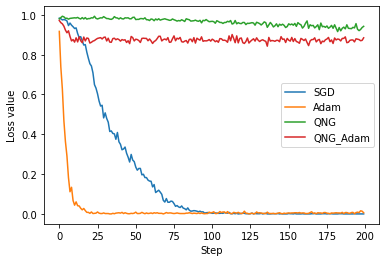

In [15]:
plt.show()
plt.plot(loss_values_sgd, label="SGD")
plt.plot(loss_values_adam, label="Adam")
plt.plot(loss_values_qng, label="QNG")
plt.plot(loss_values_qng_adam, label="qng_adam")
plt.xlabel("Step")
plt.ylabel("Loss value")
plt.legend()
plt.show()

In [21]:
# Get statevector from circuit
psi = qiskit.quantum_info.Statevector.from_instruction(qc)
rho_psi = qiskit.quantum_info.DensityMatrix(psi)
psi_hat = qiskit.quantum_info.Statevector(qtm.base_qtm.get_u_hat(
    thetas = thetas, 
    create_circuit_func = qtm.qtm_nqubit.u_cluster_nlayer_nqubit, 
    num_qubits = qc.num_qubits,
    num_layers = num_layers
))
rho_psi_hat = qiskit.quantum_info.DensityMatrix(psi_hat)
# Calculate the metrics

trace, fidelity = qtm.base_qtm.get_metrics(psi, psi_hat)
print("Trace: ", trace)
print("Fidelity: ", fidelity)

Trace:  0.20446543968909892
Fidelity:  (0.9581938843005963-1.4042347666609611e-10j)


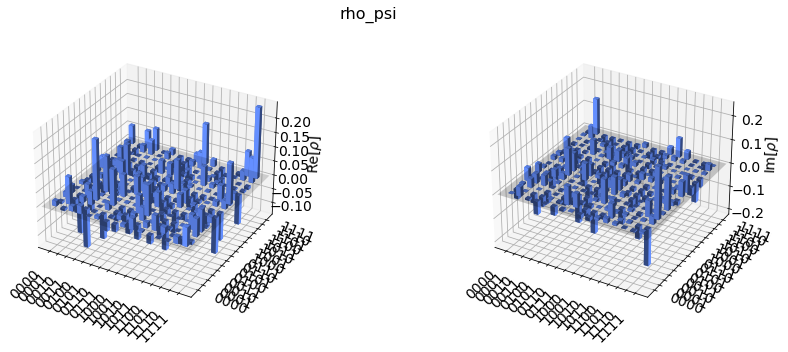

In [22]:
qiskit.visualization.plot_state_city(rho_psi, title = 'rho_psi')

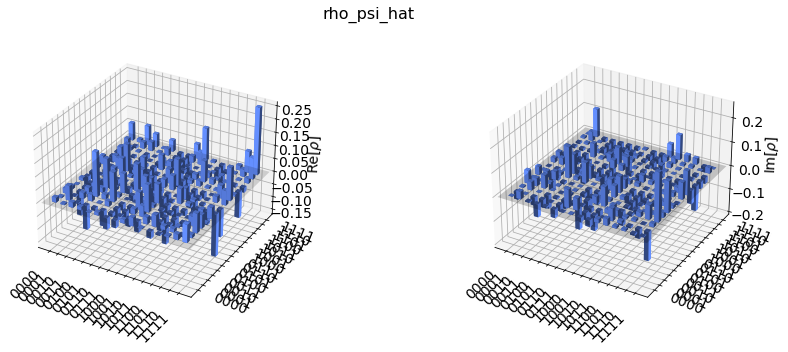

In [23]:
qiskit.visualization.plot_state_city(rho_psi_hat, title = 'rho_psi_hat')